In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

# #ignore annoying warning (from sklearn and seaborn)
# import warnings
# def ignore_warn(*args, **kwargs):
#     pass
# warnings.warn = ignore_warn 

In [2]:
data = pd.read_csv('C:/Users/sksun/Desktop/DAwithPython/Week3/dataRegression.csv')
data.shape

(232298, 16)

In [3]:
data.head()

,region,price,type,sqfeet,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,premium_house,pets_allowed,beds_per_sqfeet,baths_per_beds
0,3,7.021084,3,7.184629,1,0,0,0,1,0,33.3755,-86.8045,0,1,-6.086017,-0.405465
1,3,6.715383,3,7.032624,1,0,0,0,1,1,33.4226,-86.7065,0,1,-7.032624,0.693147
2,3,6.684612,3,6.831954,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.831954,0.000000
3,3,6.665684,3,6.953684,1,0,0,0,1,1,33.4226,-86.7065,0,1,-6.260537,-0.693147
4,3,6.802395,3,7.168580,1,0,0,0,1,1,33.4226,-86.7065,1,1,-6.475433,0.000000


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    data.drop('price',axis=1),
                                    data['price'],
                                    test_size=0.25,
                                    random_state=0)

In [5]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [6]:
lm1_pred = lm1.predict(X_test)

In [7]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 0.26957480307870957
RMSE: 0.443518413583187
R2_Score:  0.1390557835246683


In [8]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm1_pred), 'Actual_Rent': np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,967.751835,1025.0
175725,1078.298863,1050.0
94751,1143.335850,399.0
180883,1025.371272,708.0
26057,1392.938742,1825.0
...,...,...
115642,1071.229590,645.0
165159,761.583111,675.0
152673,665.406571,2100.0
72157,959.628218,1100.0


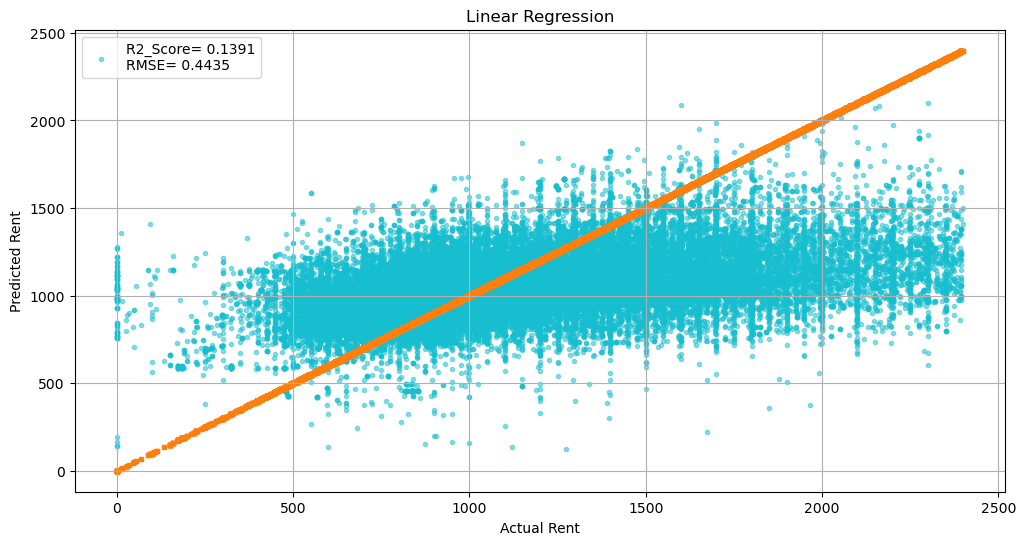

In [9]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, lm1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [10]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [11]:
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [12]:
lm2_pred = lm2.predict(X2_test)

In [13]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})
pred

,Predicted_Rent,Actual_Rent
195855,966.426676,1025.0
175725,1079.250466,1050.0
94751,1144.356792,399.0
180883,1023.474562,708.0
26057,1390.877761,1825.0
...,...,...
115642,1071.398914,645.0
165159,759.848974,675.0
152673,662.526149,2100.0
72157,957.895195,1100.0


In [14]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 0.26957480307870957
RMSE: 0.443518413583187
R2_Score:  0.1390557835246683

all features, with scaling:
MAE: 0.2694673538738083
RMSE: 0.44348971854516467
R2_Score:  0.13916718376008574


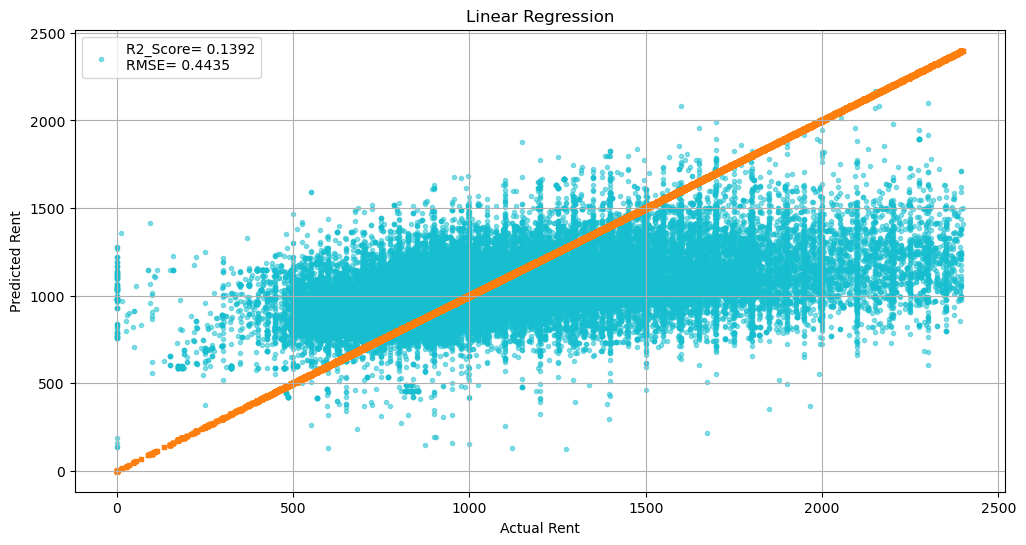

In [15]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(lm2_pred), 'Actual_Rent': np.exp(y2_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y2_test, lm2_pred), 
                np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
           ],
           loc='best')
plt.title('Linear Regression')
plt.grid()
plt.show()

In [16]:
# Decision Tree Regressor 

In [17]:
rf1 = tree.DecisionTreeRegressor()

In [18]:
rf1.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
rf2 = tree.DecisionTreeRegressor()
rf2.fit(X2_train, y2_train)

DecisionTreeRegressor()

In [20]:
rf1_pred = rf1.predict(X_test)
rf2_pred = rf2.predict(X2_test)

In [21]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})
pred

,Predicted_Rent,Actual_Rent
195855,960.561251,1025.0
175725,1055.551106,1050.0
94751,402.083658,399.0
180883,708.000000,708.0
26057,1816.628323,1825.0
...,...,...
115642,744.551209,645.0
165159,675.000000,675.0
152673,1400.000000,2100.0
72157,1116.844278,1100.0


In [22]:
pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf2_pred), 'Actual_Rent': np.exp(y2_test)})
pred

,Predicted_Rent,Actual_Rent
195855,918.436937,1025.0
175725,1350.000000,1050.0
94751,453.289758,399.0
180883,800.000000,708.0
26057,2171.000000,1825.0
...,...,...
115642,650.000000,645.0
165159,675.000000,675.0
152673,1200.000000,2100.0
72157,1069.424716,1100.0


Decision Tree Regressor:

all features, No scaling:
MAE: 0.06833827680288346
RMSE: 0.2248908158451008
R2_Score:  0.7786420406421586

all features, with scaling:
MAE: 0.16808283587172398
RMSE: 0.4108042194089918
R2_Score:  0.261379267405071


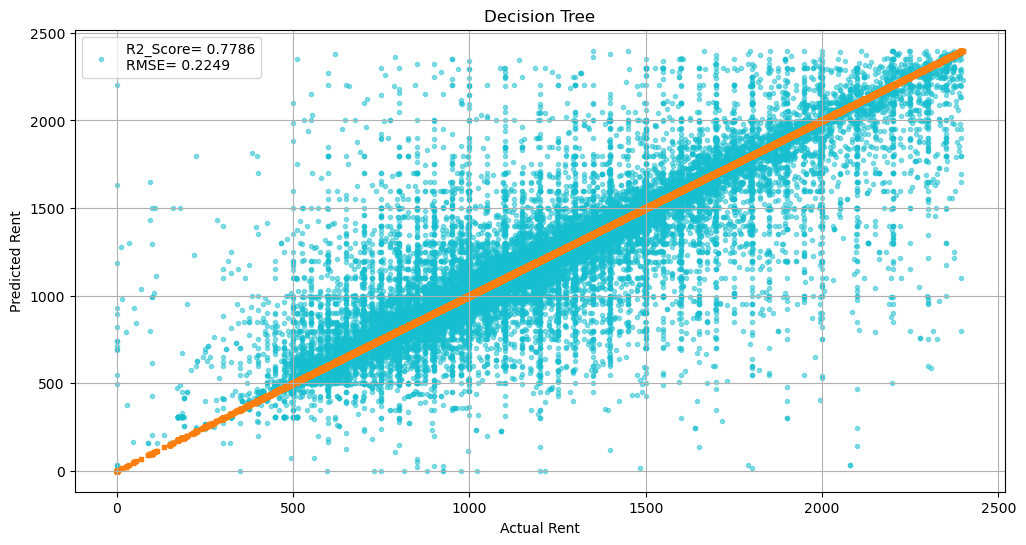

In [23]:
print('Decision Tree Regressor:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, rf2_pred))

pred = pd.DataFrame(data={'Predicted_Rent': np.exp(rf1_pred), 'Actual_Rent': np.exp(y_test)})

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(pred['Actual_Rent'], pred['Predicted_Rent'], color='tab:cyan', marker=".", label='Predicted', alpha=0.5)
ax1.scatter(pred['Actual_Rent'], pred['Actual_Rent'], s=10, color='tab:orange', marker="s", label='Actual')

plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.legend(['R2_Score= {:.4f}\nRMSE= {:.4f} '.format(
                metrics.r2_score(y_test, rf1_pred), 
                np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
           ],
           loc='best')
plt.title('Decision Tree')
plt.grid()
plt.show()